In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
pd.set_option("display.max_rows", 100)
# import xml.etree.ElementTree as ET
import cv2
import rasterio
from rasterio.plot import show as rastershow
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
import json

In [2]:
trial = "NC_2022-03-29"

In [3]:
base_path = f"../data/semifield-developed-images-trial/{trial}"
image_path = f"{base_path}/images"
orthomosaic_path = f"{base_path}/autosfm/ortho/orthomosaic.tif"
annotation_file_path = f"{base_path}/autosfm/detections.csv"
metadata_path = f"{base_path}/metadata"

In [4]:
orthomosaic = rasterio.open(orthomosaic_path)

In [5]:
box_metadata = dict()
metadata_files = os.listdir(metadata_path)
for file in metadata_files:
    image_id = Path(file).stem
    # image_id = file.split(".")[0]
    filename = Path(metadata_path, file)
    with open(filename, "r") as f:
        contents = json.load(f)
    # print(image_id)
    box_metadata[image_id] = contents
    # print(box_metadata)

In [6]:
def disp_orthomosaic():
    f, ax = plt.subplots(1, 1, dpi=200)
    rastershow(orthomosaic, ax=ax)
    plt.show()

In [15]:
# Utility plotting function to plot all the identified primary boxes
def plot_rectangle(image_metadata, display_orthomosaic=True, seed=42):
    
    import random
    random.seed(seed)
    
    # image_store = {image.image_id: image for image in images}
    
    f, ax = plt.subplots(1, 1, dpi=300)
    ax.set_aspect("equal", adjustable="box")
    
    if display_orthomosaic:
        rastershow(orthomosaic, ax=ax)
    
    bboxes_plotted = set()
    
    primary_bboxes = []
    
    for img in image_metadata.keys():        
        r, g, b = random.random(), random.random()%0.5, random.random()
        img_color = (r, g, b, 0.05)
        linewidth = 1
        handle = ax.scatter(
            image_metadata[img]["camera_info"]["camera_location"][0], 
            image_metadata[img]["camera_info"]["camera_location"][1], 
            marker="x", color=img_color)
        
        for bbox in image_metadata[img]["bboxes"]:
            if bbox['bbox_id'] in bboxes_plotted:
                continue
            
            if bbox["is_primary"]:
                pprint(bbox)
                primary_bboxes.append(bbox)
            else:
                r, g, b = random.random(), random.random(), random.random()
                color = (r, g, b, 0.05)
                linewidth = 1
                
                anchor = bbox["global_coordinates"]["bottom_left"]
                width = bbox["global_coordinates"]["top_right"][0] - bbox["global_coordinates"]["top_left"][0]
                height = bbox["global_coordinates"]["top_left"][1] - bbox["global_coordinates"]["bottom_left"][1]
                patch = Rectangle(anchor, width, height, facecolor="none", edgecolor=color, linewidth=linewidth, linestyle="--")
                ax.add_patch(patch)

                bboxes_plotted.add(bbox["bbox_id"])
    
    classes = list(set([bbox["bbox_id"] for bbox in primary_bboxes]))
    cls_colors = dict()
    for cls in classes:
        r, g, b = random.random(), random.random()%0.5, random.random()
        color = (r, g, b)
        cls_colors[cls] = color
    
    labels = []
    handles = []
    # Plot the primary bboxes
    for bbox in primary_bboxes:
        color = cls_colors[bbox["bbox_id"]]
        linewidth = 1
        
        anchor = bbox["global_coordinates"]["bottom_left"]
        width = bbox["global_coordinates"]["top_right"][0] - bbox["global_coordinates"]["top_left"][0]
        height = bbox["global_coordinates"]["top_left"][1] - bbox["global_coordinates"]["bottom_left"][1]
        patch = Rectangle(anchor, width, height, facecolor="none", edgecolor=color, linewidth=linewidth)
        ax.add_patch(patch)
        
        # Highlight the image fov and center
        img = image_metadata[bbox["image_id"]]
        
        handle = ax.scatter(img["camera_info"]["camera_location"][0], img["camera_info"]["camera_location"][1], marker="x", color=color)
        handles.append(handle)
        labels.append(bbox["bbox_id"])
        
    ax.legend(handles, labels, ncol=5, loc="lower left", fontsize="xx-small", bbox_to_anchor=(0.8, 1.0))
    plt.show()

In [16]:
def plot_local(images):
    
    for img in images:
        f, ax = plt.subplots(1, 1, dpi=100)
        ax.imshow(img.array)
        
        for bbox in img.bboxes:
            anchor = bbox.local_coordinates.bottom_left
            width = bbox.local_coordinates.top_right[0] - bbox.local_coordinates.top_left[0]
            height = bbox.local_coordinates.top_left[1] - bbox.local_coordinates.bottom_left[1]
            patch = Rectangle(anchor, width, height, facecolor="none", edgecolor=(1., 0., 0.), linewidth=1)
            ax.add_patch(patch)
        ax.set_title(img.image_id)
        plt.show()
            

In [17]:
# disp_orthomosaic()

{'bbox_id': 'NC_2_1_1648579721000.0_0',
 'cls': 'plant',
 'global_coordinates': {'bottom_left': [0.20290312261930968,
                                        0.017647401140329616],
                        'bottom_right': [0.5592362406858544,
                                         0.04924006916952528],
                        'top_left': [0.1736029638675335, 0.34669532890039545],
                        'top_right': [0.5299360819340783, 0.37828799692959114]},
 'image_id': 'NC_2_1_1648579721000.0',
 'is_primary': True,
 'local_coordinates': {'bottom_left': [3762.41357421875, 3907.363037109375],
                       'bottom_right': [5330.3173828125, 3907.363037109375],
                       'top_left': [3762.41357421875, 2460.431884765625],
                       'top_right': [5330.3173828125, 2460.431884765625]},
 'num_overlapping_bboxes': 4,
 'overlapping_bbox_ids': ['NC_2_4_1648579783000.0_6',
                          'NC_4_1_1648579252000.0_5',
                          'NC_2_5_

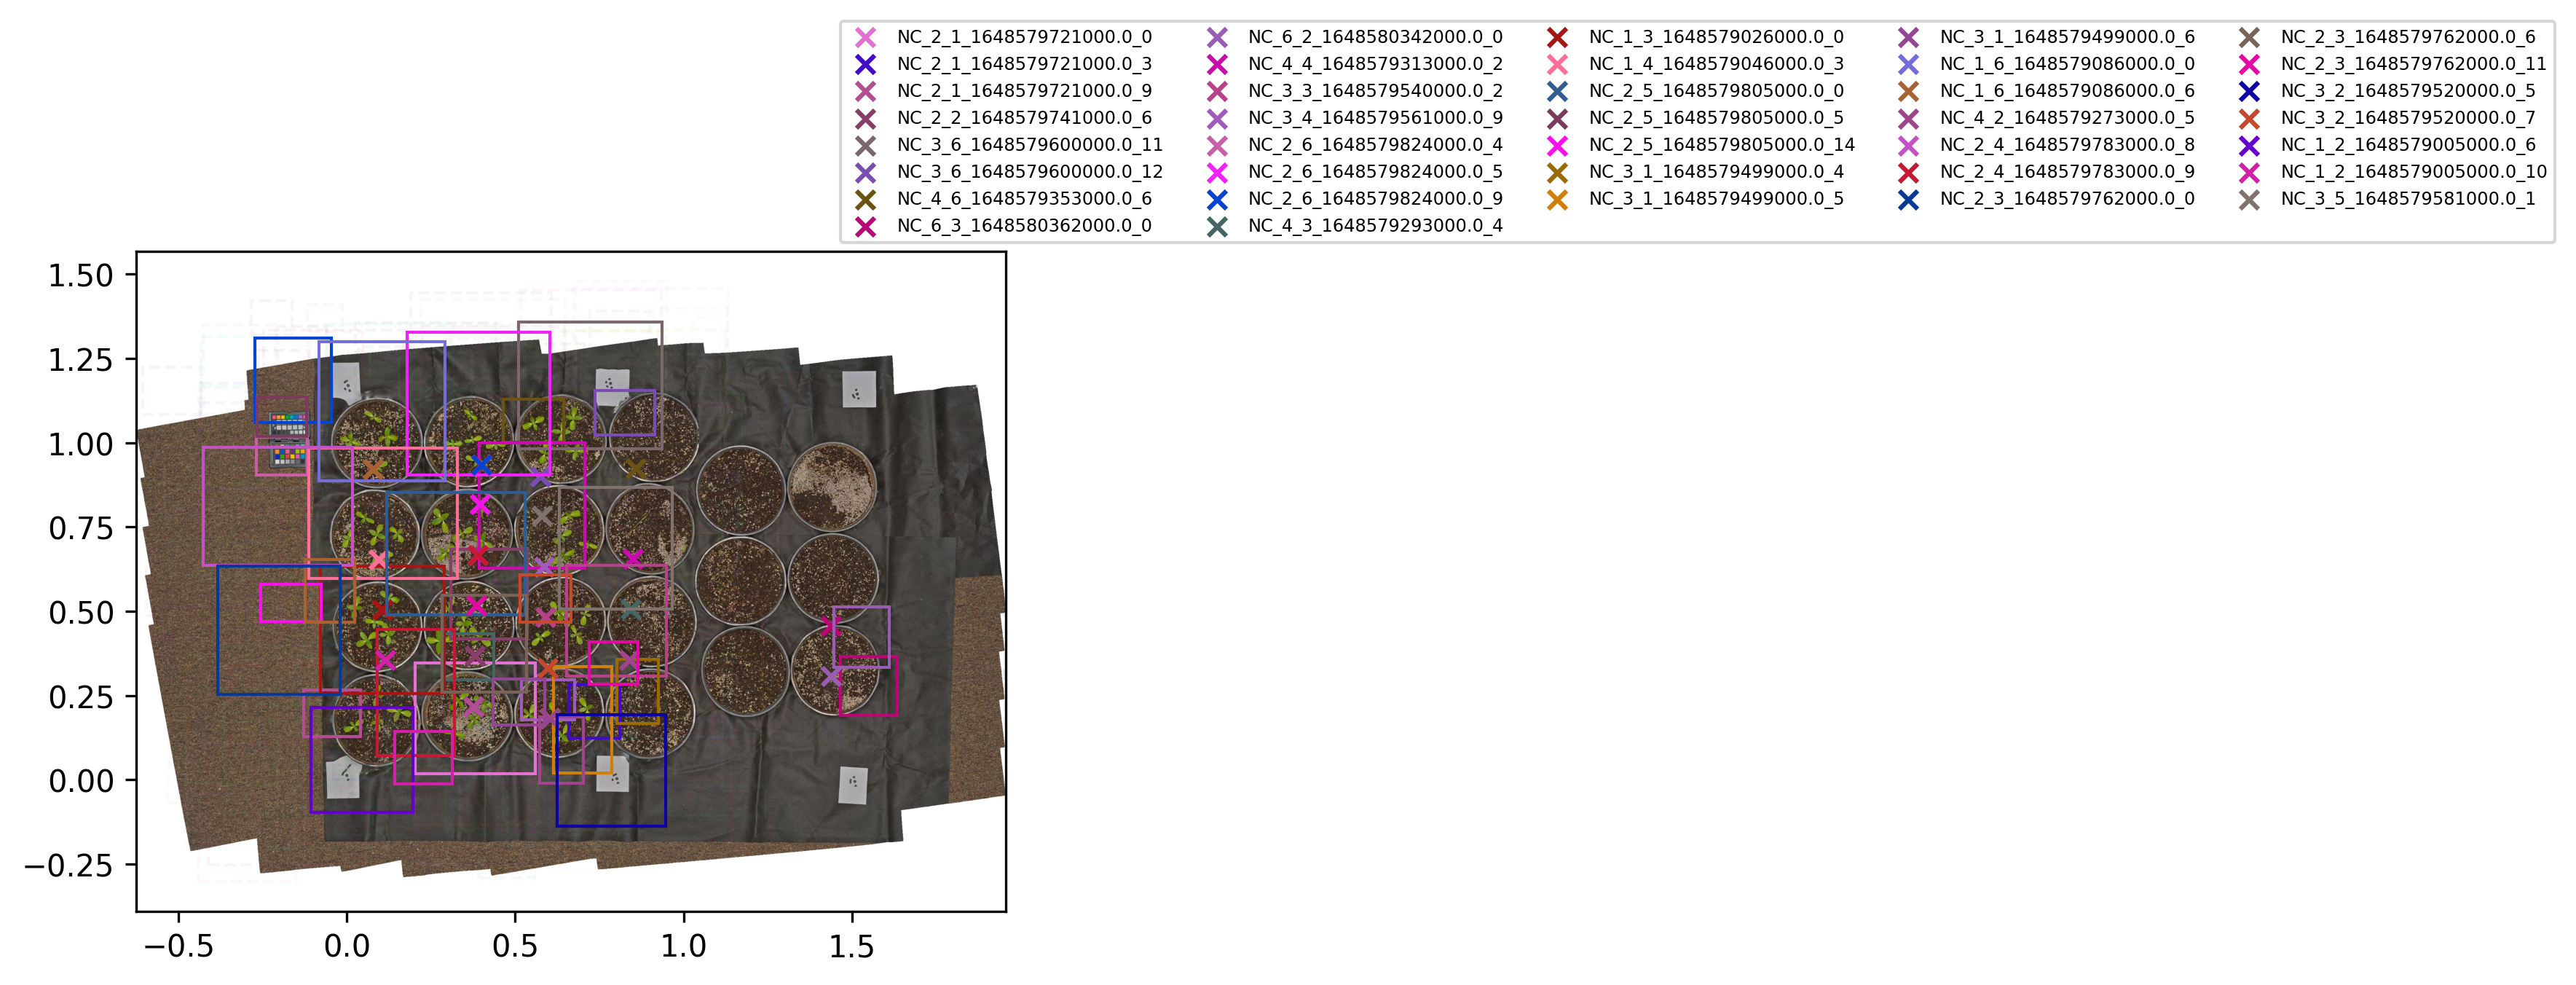

In [18]:
plot_rectangle(box_metadata, display_orthomosaic=True, seed=424242)

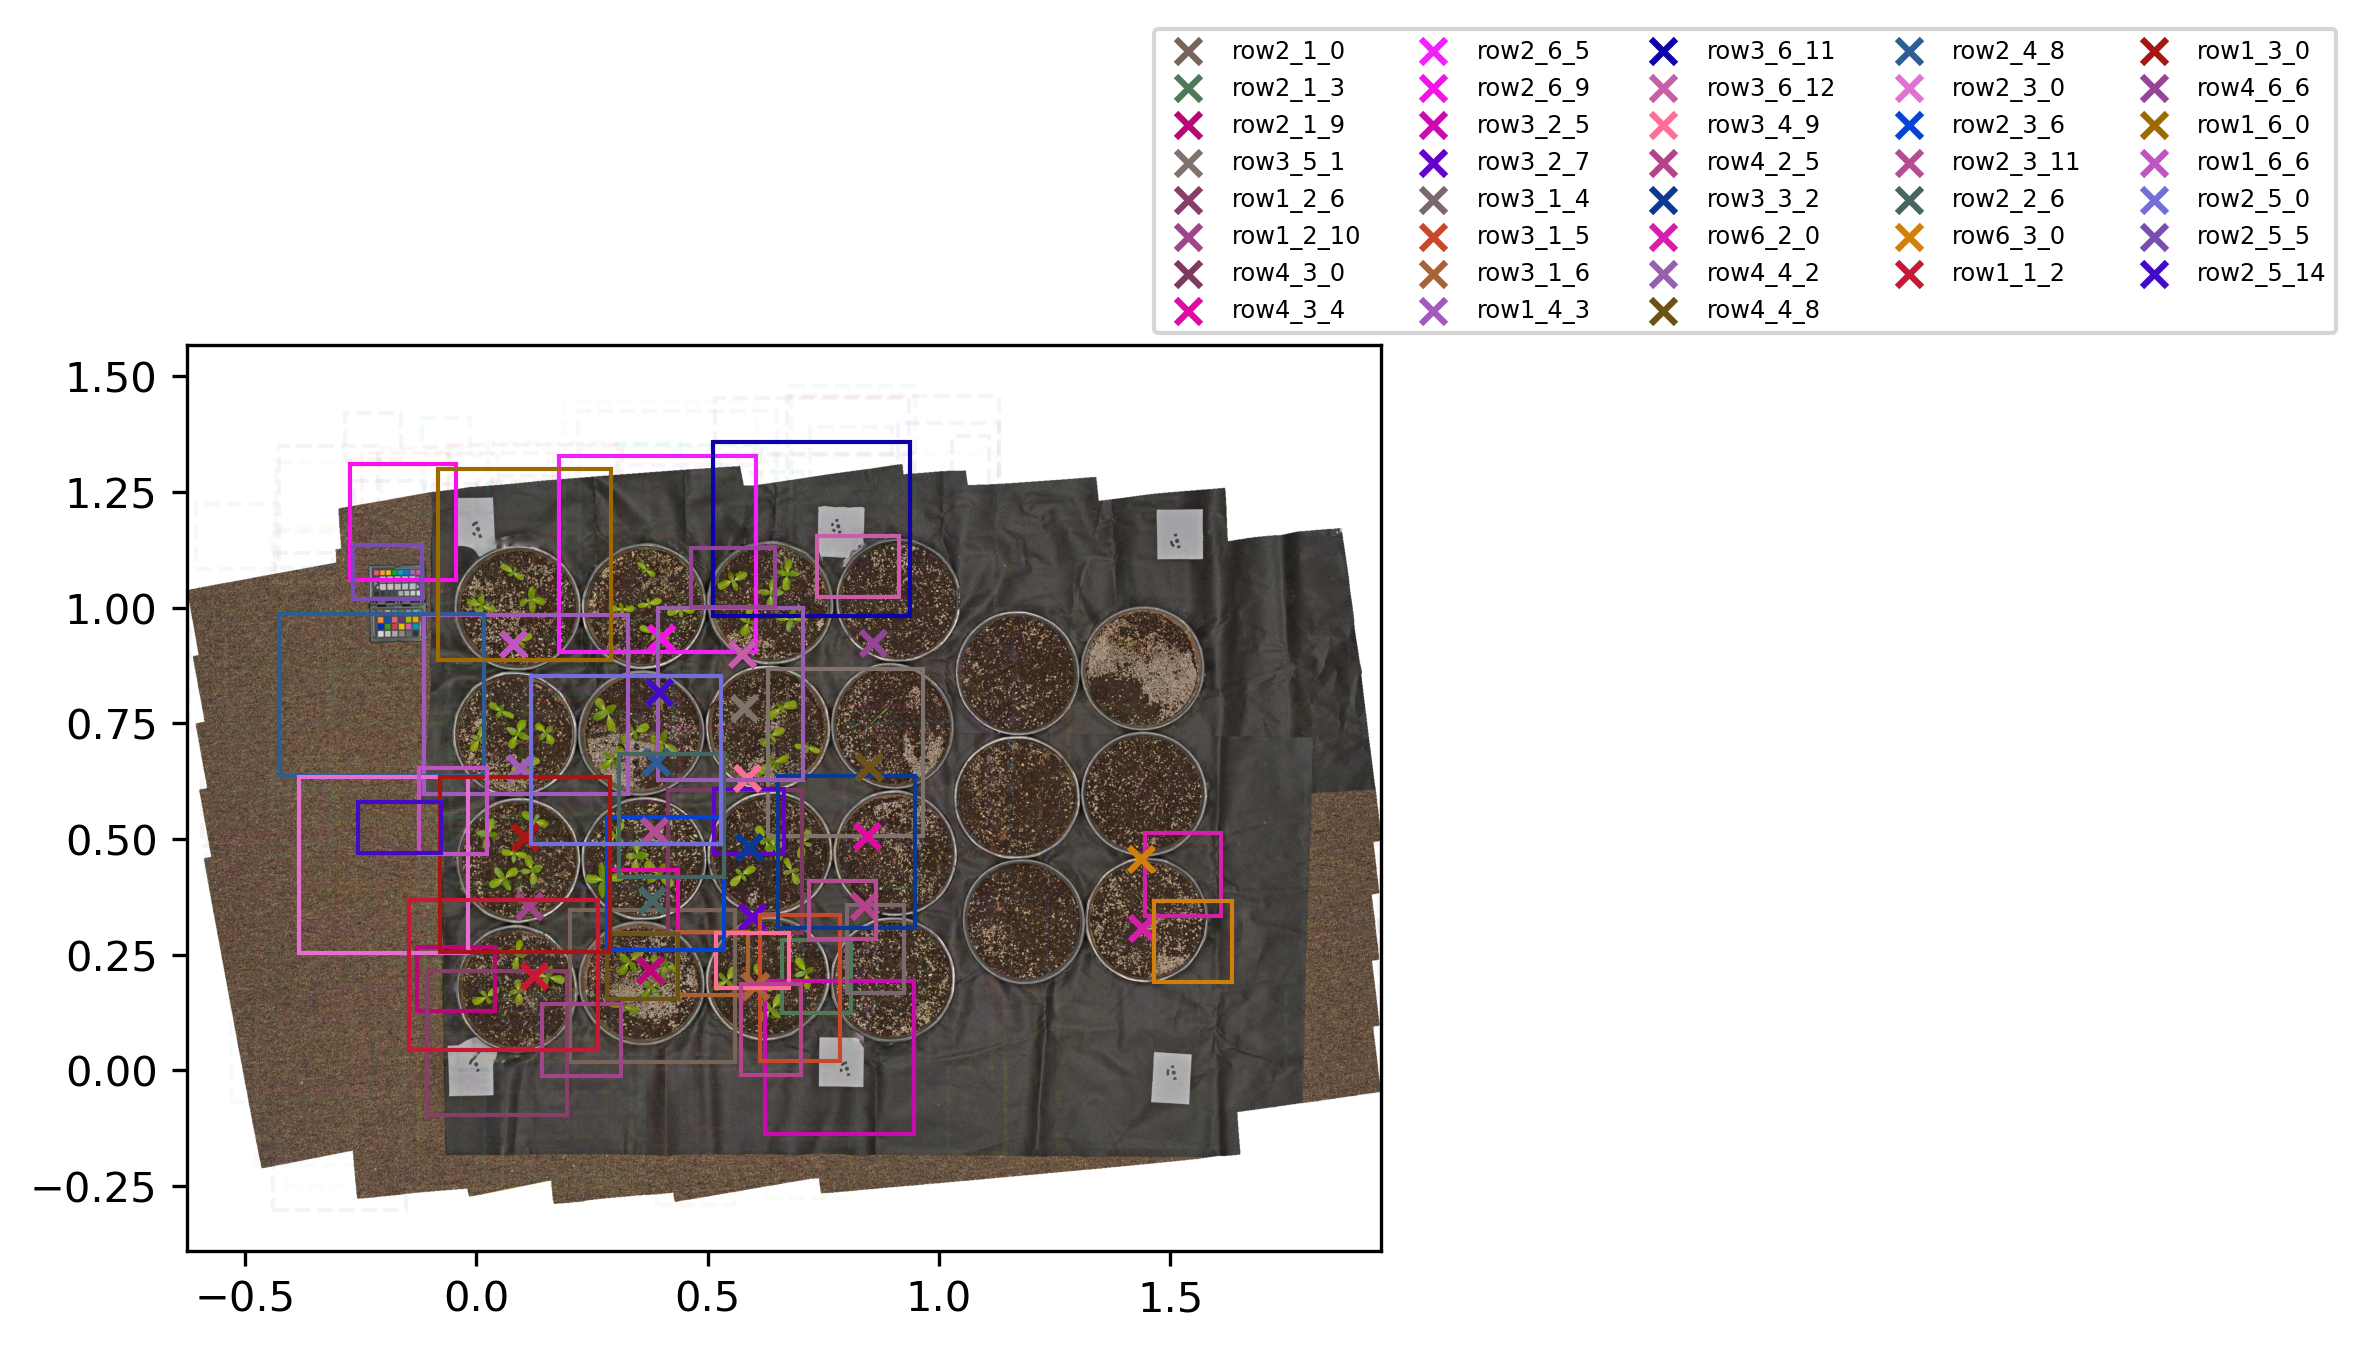

In [10]:
plot_rectangle(box_metadata, display_orthomosaic=True, seed=424242)